In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def relu(z):
  return np.maximum(0,z)
def linear(z):
  return z
def derilinear(z):
  return 1
def derirelu(z):
  return relu(z)>0
#z = np.array([-2,-5]).reshape(2,1)
#p = derirelu(z)
#p
#np.maximum(0,z)

In [3]:
def initialise(in_neuron, hidden_neuron,out_neuron):
    w1 = np.random.rand(hidden_neuron, in_neuron)-0.5
    w2 = np.random.rand(out_neuron, hidden_neuron)-0.5
    b1 = np.zeros((hidden_neuron, 1))
    b2 = np.zeros((out_neuron, 1))
    return w1, b1, w2,b2
w1, b1, w2,b2 = initialise(2,3,2)

In [4]:
def forwardpass(a0, w1, b1, w2, b2):
  z1 = np.dot(w1, a0) + b1
  a1 = relu(z1)
  z2 = np.dot(w2, a1) + b2
  a2 = linear(z2)
  return z1,a1,z2, a2
w1, b1, w2,b2 = initialise(2,3,2)
a0 = np.array([0.5, 0.5]).reshape(2,1)
z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)

In [5]:
def gradient(a2,y,z2,a1,w2,z1,a0):
  db2 = (a2-y)* derilinear(z2)
  de2 = db2
  dw2 = np.dot(de2, a1.T)

  da1 = np.dot(w2.T, de2)

  db1 = da1*derirelu(z1)
  de1 = db1
  dw1 = np.dot(de1, a0.T)

  return dw1, db1, dw2, db2
w1, b1, w2,b2 = initialise(2,3,2)
a0 = np.array([0.5, 0.5]).reshape(2,1)
y = np.array([-5, 5]).reshape(2,1)
z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)
dw1, db1, dw2, db2 = gradient(a2,y,z2,a1,w2,z1,a0)


In [6]:
def updateweights(w1,b1,w2,b2,dw1,db1,dw2,db2, eta):
  w1 = w1 - eta*dw1
  b1 = b1 - eta*db1
  w2 = w2 - eta*dw2
  b2 = b2 - eta*db2
  return w1,b1,w2,b2
eta = 0.1
w1, b1, w2,b2 = initialise(2,3,2)

a0 = np.array([0.5, 0.5]).reshape(2,1)
y = np.array([-.5, .5]).reshape(2,1)
z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)
dw1, db1, dw2, db2 = gradient(a2,y,z2,a1,w2,z1,a0)
w1,b1,w2,b2 = updateweights(w1,b1,w2,b2,dw1,db1,dw2,db2, eta)



In [ ]:
# the network above is complete

In [7]:
#let train the network using just one example
eta = 1
epoch = 10
w1, b1, w2,b2 = initialise(2,5,2)

a0 = np.array([0.5, 0.5]).reshape(2,1)
y = np.array([-.5, .5]).reshape(2,1)
for i in range(epoch):
  z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)
  dw1, db1, dw2, db2 = gradient(a2,y,z2,a1,w2,z1,a0)
  w1,b1,w2,b2 = updateweights(w1,b1,w2,b2,dw1,db1,dw2,db2, eta)
  c = (np.sum((a2-y)**2))*0.5
  #print(c)
#print(a2)



In [31]:
# let train the neuron with a set of values. We will perform basic reflection
# we need to know the reflection matrix
# the reflection matrix is [[-1,0],[0,1]], meaning, if you take any matrix
#multiply by this matrix, you get it reflection with respect to the y-axis

x_input = np.random.uniform(-1,1,(1000,2))
reflection_matrix = [[-1,0],[0,1]]
x_ground = np.dot(reflection_matrix, x_input.T).T
#print(x_input)
#print(x_ground)

In [32]:
#let plot that on a graph
#we are still in the training phase

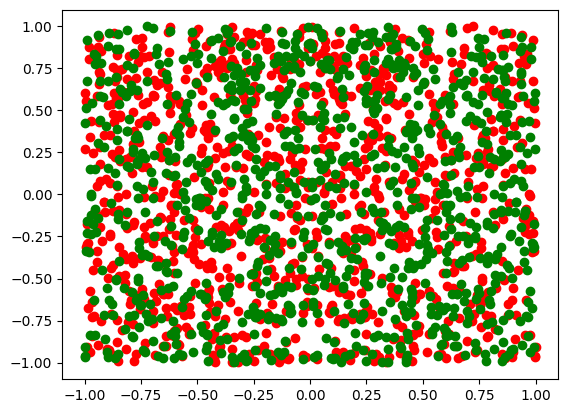

In [33]:
plt.scatter(x_input[:,0], x_input[:,1], c='RED')
plt.scatter(x_ground[:,0], x_ground[:,1], c='GREEN')
plt.show()

In [37]:
#let train the network using this set of inputs, that's x_input and x_ground4
eta = .1
epoch = 100
w1, b1, w2,b2 = initialise(2,10,2)

#a0 = np.array([0.5, 0.5]).reshape(2,1)
#y = np.array([-.5, .5]).reshape(2,1)
for i in range(epoch):
  c = 0
  for j in range(1000):
    a0 = x_input[j,:].T.reshape(2,1)
    y = x_ground[j,:].T.reshape(2,1)
    z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)
    dw1, db1, dw2, db2 = gradient(a2,y,z2,a1,w2,z1,a0)
    w1,b1,w2,b2 = updateweights(w1,b1,w2,b2,dw1,db1,dw2,db2, eta)
    c += (np.sum((a2-y)**2))*0.5
  print(c)
#print(a2)
#so, the training phase is over here

9.537244854998411
1.1154269485918318
0.4358426495566972
0.25462812162345555
0.1574067146567309
0.09804387941967385
0.06280347779514311
0.038550216777985445
0.022966097539057075
0.013903927852734404
0.008202649212603356
0.004795351468281923
0.0027931140680342277
0.0016777699760319924
0.0010434194348177986
0.0006934910482418623
0.0004737538791587204
0.00033934691730586774
0.0002555197761793851
0.00020019378848833825
0.00015982043278314032
0.00013099871554009704
0.00010986811759576434
9.242097053858476e-05
7.795189808282855e-05
6.584987687705197e-05
5.568340313660505e-05
4.71218823606624e-05
3.990255722567328e-05
3.381073558370103e-05
2.8668342588811483e-05
2.4326496283307632e-05
2.0659950344822575e-05
1.756349804008036e-05
1.4933955820986294e-05
1.2699063647827998e-05
1.0801952935885697e-05
9.191117030677284e-06
7.823111163507582e-06
6.661130199640734e-06
5.6739679147421615e-06
4.835159368113699e-06
4.122258631719981e-06
3.516227461371846e-06
3.000917205575928e-06
2.5626295639790846e-06


In [ ]:
# now, let see if it can make the reflection for a certain given number of values
# most especially we will take the equation y=x^2
# we will give one side and see if the network can give us the other side

In [38]:
#let create our set of values
test_x = np.arange(0,1,.01)
test_y = test_x**2

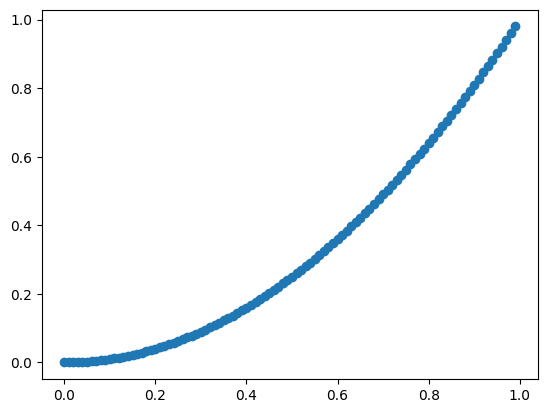

In [39]:
#let plot this our set of values
plt.scatter(test_x, test_y)
plt.show()

In [40]:
#from the graph above, the network should generate the other side
test_x = np.arange(0,1,.01)
test_y = test_x**2

test = np.column_stack([test_x, test_y]) #column_stack help to combine 2 matrices


In [41]:
# doing the actual testing with our points
#plt.scatter(test[:,0], test[:,1])
#plt.show()
n = test.shape[0]
o_x = [] # store the x value the network gives
o_y = [] # store the y values the newtork gives
for i in range(n):
  a0  = test[i,:].T.reshape(2,1)
  z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])
  # the answer is in a2
#we have all our values already, let plots

In [16]:
n = test.shape[0]
n

100

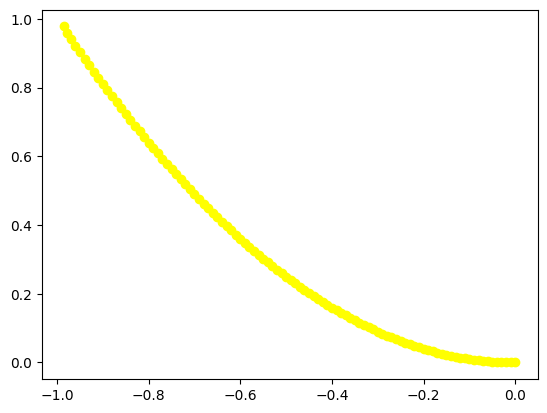

In [42]:

#ploting the values
plt.scatter(o_x, o_y, c ="yellow")
plt.show()

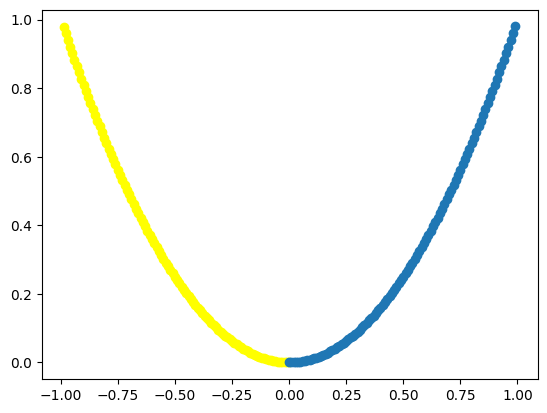

In [43]:
#from the graph, we can conclude that the network has actually learn perfectly
#let put the two graphs together

plt.scatter(o_x, o_y, c ="yellow")
plt.scatter(test[:,0], test[:,1])
plt.show()

WE CLEARLY SEE IT IS A PERFECT REFLECTION, THAT GREAT


NOW, LET COMPUTE AN IMAGE REFLECTION USING THIS NETWORK


In [44]:
# FOR AN IMAGE REFLECTION USING THIS NETWORK
#let first load the csv file, to get access to the set of points

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/StartDeepLearning/'

Mounted at /content/gdrive


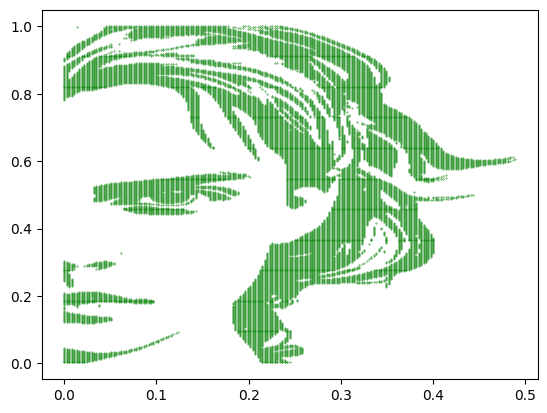

In [45]:
import pandas as pd
xtest = pd.read_csv('/content/gdrive/MyDrive/StartDeepLearning/file.csv')
xtest = np.array(xtest)
plt.scatter(xtest[:,0], xtest[:,1],c='GREEN',s=0.1)

let train with the image above

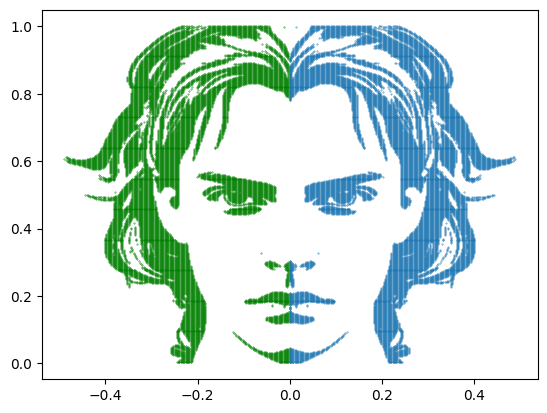

In [46]:
n = xtest.shape[0]
o_x = [] # store the x value the network gives
o_y = [] # store the y values the newtork gives
for i in range(n):
  a0  = xtest[i,:].T.reshape(2,1)
  z1,a1,z2, a2 = forwardpass(a0, w1, b1, w2, b2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])

plt.scatter(o_x, o_y, c ="green", s=0.1)
plt.scatter(xtest[:,0], xtest[:,1], s=0.1)
plt.show()

we perfectly see a reflection of this image

In [48]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
%cd /content/drive/MyDrive/StartDeepLearning


/content/drive/MyDrive/StartDeepLearning


In [51]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [52]:
!git config --global user.name "junior-idrice"
!git config --global user.email "dongmojunior18@gmail.com"


In [53]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/StartDeepLearning/.git/


In [54]:
!git remote add origin https://github.com/Junior-idrice/Neural_Network_for_2D_reflection.git


In [55]:
!git add .
!git commit -m "neural network"


[master (root-commit) 38c8ad8] neural network
 10 files changed, 131178 insertions(+)
 create mode 100644 bw_image_points.csv
 create mode 100644 file.csv
 create mode 100644 il.csv
 create mode 100644 image.jpg
 create mode 100644 image_points.csv
 create mode 100644 images.ipynb
 create mode 100644 imaps.csv
 create mode 100644 one_neuron.ipynb
 create mode 100644 onemore.ipynb
 create mode 100644 perform_diff_task_with_this_neuron.ipynb


In [77]:
# 1. Remove token from the notebook file locally (edit the file to remove it)

# 2. Stage the changes
git add perform_diff_task_with_this_neuron.ipynb

# 3. Amend the last commit (if the token was added in the last commit)
git commit --amend --no-edit

# 4. Or if it’s further back, use interactive rebase to fix history:
git rebase -i HEAD~N  # where N is number of commits to go back

# 5. Force push after cleanup (be careful with force push!)
git push -f origin master


SyntaxError: invalid syntax (ipython-input-106079690.py, line 4)